# 1. Setup

## 1.1 Install Dependencies

## 1.2 Import Dependencies

In [1]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3 Set GPU Growth

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
len(gpus) 

2

## 1.4 Create Folder Structures

In [5]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor') 

In [6]:
# Make the directories
# os.makedirs(POS_PATH)
# # os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

# 2. Collect Positives and Anchors

## 2.1 Untar Labelled Faces in the Wild Dataset

In [ ]:
# http://vis-www.cs.umass.edu/lfw/

In [ ]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
# !tar -xf lfw.tgz

In [ ]:
# Move LFW Images to the following repository data/negative
# for directory in os.listdir('lfw'):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join(NEG_PATH, file)
#         os.replace(EX_PATH, NEW_PATH)

## 2.2 Collect Positive and Anchor Classes

In [7]:
# Import uuid library to generate unique image names
import uuid

In [8]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\ba67e40f-13af-11ee-a8af-6c2b59da29e4.jpg'

In [9]:
# # Establish a connection to the webcam
# cap = cv2.VideoCapture(0)

# while cap.isOpened(): 
#     ret, frame = cap.read()
   
#     # Cut down frame to 250x250px
#     frame = frame[120:120+250,200:200+250, :]
    
#     # Collect anchors 
#     if cv2.waitKey(1) == ord('a'):
#         # Create the unique file path 
#         imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
#         # Write out anchor image
#         cv2.imwrite(imgname, frame)
    
#     # Collect positives
#     if cv2.waitKey(1) == ord('p'):
#         # Create the unique file path 
#         imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
#         # Write out positive imageq
#         cv2.imwrite(imgname, frame)
    
#     # Show image back to screen
#     cv2.imshow('Image Collection', frame)
    
#     # Breaking gracefully
#     if cv2.waitKey(1) == ord('q'):
#         break
        
# # Release the webcam
# cap.release()
# # Close the image show frame
# cv2.destroyAllWindows()


In [10]:
import cv2
import os
import uuid

# Load the pre-trained face detector model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

# Set the paths to store anchor and positive images
ANC_PATH = os.path.join('data', 'anchor')  # Update with the desired anchor images path
POS_PATH = os.path.join('data', 'positive')  # Update with the desired positive images path

while cap.isOpened():
    ret, frame = cap.read()

    # Detect faces in the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) > 0:  # If faces are detected
        # Take the first detected face
        (x, y, w, h) = faces[0]

        # Cut down frame to the detected face region
        face_image = frame[y:y + h, x:x + w]

        # Resize the face image to 250x250 pixels
        resized_face_image = cv2.resize(face_image, (250, 250))

        # Collect anchors
        if cv2.waitKey(1) == ord('a'):
            # Create the unique file path
            imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
            # Write out anchor image
            cv2.imwrite(imgname, resized_face_image)

        # Collect positives
        if cv2.waitKey(1) == ord('p'):
            # Create the unique file path
            imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
            # Write out positive image
            cv2.imwrite(imgname, resized_face_image)

        # Show the face image
        cv2.imshow('Face Image', resized_face_image)
    else:
        # Show the original frame if no faces are detected
        cv2.imshow('Image Collection', frame)

    # Breaking gracefully
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()



# 2.x NEW - Data Augmentation

In [ ]:
# def data_aug(img):
#     data = []
#     for i in range(9):
#         img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
#         img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
#         # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
#         img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
#         data.append(img)
    
#     return data

In [ ]:
# import os
# import uuid

# img_path = os.path.join(ANC_PATH, '3f7e8e66-1340-11ee-bec6-32a8967541fa.jpg')
# img = cv2.imread(img_path)
# augmented_images = data_aug(img)

# for image in augmented_images:
#     cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
# for file_name in os.listdir(os.path.join(POS_PATH)):
#     img_path = os.path.join(POS_PATH, file_name)
#     img = cv2.imread(img_path)
#     augmented_images = data_aug(img) 
    
#     for image in augmented_images:
#         cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [11]:
anchor = tf.data.Dataset.list_files(os.path.join(ANC_PATH, '*.jpg')).take(700)
positive = tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(700)
negative = tf.data.Dataset.list_files(os.path.join(NEG_PATH, '*.jpg')).take(700)

In [12]:
ANC_PATH+'/*.jpg'

'data\\anchor/*.jpg'

In [13]:
# # # Only work in Window
# anchor = tf.data.Dataset.list_files(ANC_PATH+'\\*.jpg').take(300)
# positive = tf.data.Dataset.list_files(POS_PATH+'\\*.jpg').take(300)
# negative = tf.data.Dataset.list_files(NEG_PATH+'\\*.jpg').take(300)

In [14]:
dir_test = anchor.as_numpy_iterator()

In [15]:
dir_test.next()

b'data\\anchor\\225ab240-13b0-11ee-a340-6c2b59da29e4.jpg'

## 3.2 Preprocessing - Scale and Resize

In [16]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path, 'rb')
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [17]:
img = preprocess('data/anchor/0a5226bd-13a3-11ee-8ac9-6c2b59da29e4.jpg')

In [18]:
img.numpy().max() 

0.9313725

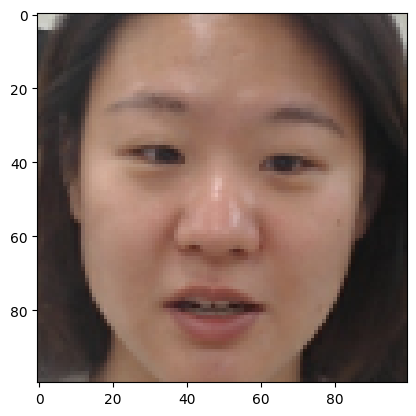

In [19]:
plt.imshow(img)

In [20]:
# dataset.map(preprocess)

## 3.3 Create Labelled Dataset

In [21]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [22]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [23]:
samples = data.as_numpy_iterator()

In [24]:
exampple = samples.next()
exampple

(b'data\\anchor\\214dd5c0-13a3-11ee-a9ce-6c2b59da29e4.jpg',
 b'data\\positive\\d5c9ad5a-13af-11ee-bfb8-6c2b59da29e4.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [25]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [26]:
res = preprocess_twin(*exampple)

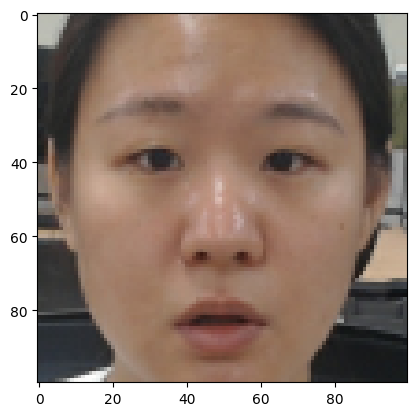

In [27]:
plt.imshow(res[1])   #[0]: anchor [1]:positive

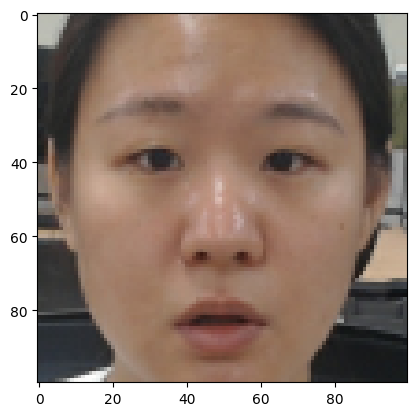

In [28]:
plt.imshow(res[1])

In [29]:
res[2]

1.0

In [30]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [31]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [32]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [33]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [34]:
train_samples = train_data.as_numpy_iterator()

In [35]:
train_sample = train_samples.next()

In [36]:
len(train_sample[0])

16

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [37]:
inp = Input(shape=(100,100, 3), name='input_image')
inp

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_image')>

In [38]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)
c1

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d')>

In [39]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [40]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
m2

<KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'max_pooling2d_1')>

In [41]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [42]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [43]:
d1

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>

In [44]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [45]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [46]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [47]:
embedding = make_embedding()

In [48]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

## 4.2 Build Distance Layer

In [49]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [50]:
l1 = L1Dist()

## 4.3 Make Siamese Model

In [51]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [52]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [53]:
siamese_layer = L1Dist()

In [54]:
distances = siamese_layer(inp_embedding, val_embedding)

In [55]:
classifier = Dense(1, activation='sigmoid')(distances)

In [56]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [57]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [58]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [59]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [60]:
siamese_model = make_siamese_model()

In [61]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training

## 5.1 Setup Loss and Optimizer

In [62]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [63]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [64]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [65]:
test_batch = train_data.as_numpy_iterator()

In [66]:
batch_1 = test_batch.next()

In [67]:
X = batch_1[:2]

In [68]:
y = batch_1[2]

In [69]:
y

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
      dtype=float32)

In [70]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

## 5.4 Build Training Loop

In [71]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(train_data))
        
#         # Creating a metric object 
#         r = Recall()
#         p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(train_data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [72]:
EPOCHS = 50

In [73]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
62/62 [==============================] - 17s 123ms/step

 Epoch 2/50
62/62 [==============================] - 7s 116ms/step

 Epoch 3/50
62/62 [==============================] - 7s 115ms/step

 Epoch 4/50
62/62 [==============================] - 7s 116ms/step

 Epoch 5/50
62/62 [==============================] - 7s 115ms/step

 Epoch 6/50
62/62 [==============================] - 7s 115ms/step

 Epoch 7/50
62/62 [==============================] - 7s 116ms/step

 Epoch 8/50
62/62 [==============================] - 7s 118ms/step

 Epoch 9/50
62/62 [==============================] - 7s 116ms/step

 Epoch 10/50
62/62 [==============================] - 7s 115ms/step

 Epoch 11/50
62/62 [==============================] - 7s 118ms/step

 Epoch 12/50
62/62 [==============================] - 7s 114ms/step

 Epoch 13/50
62/62 [=====

# 6. Evaluate Model

## 6.1 Import Metrics

In [74]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [75]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [76]:
y_hat= siamese_model.predict([test_input, test_val])
y_hat

array([[7.9816027e-06],
       [5.2600957e-10],
       [2.6482749e-13],
       [1.0000000e+00],
       [6.8348333e-10],
       [9.9999940e-01],
       [1.0000000e+00],
       [9.9754876e-01],
       [4.7647259e-06],
       [3.1143483e-09],
       [6.4460826e-10],
       [1.0000000e+00],
       [9.9563462e-01],
       [5.2635656e-11],
       [1.0000000e+00],
       [4.8490423e-11]], dtype=float32)

In [77]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]

In [78]:
y_true

array([0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

## 6.3 Calculate Metrics

In [79]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [80]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# r = Recall()
# p = Precision()

# for test_input, test_val, y_true in test_data.as_numpy_iterator():
#     yhat = siamese_model.predict([test_input, test_val])
#     r.update_state(y_true, yhat)
#     p.update_state(y_true,yhat) 

# print(r.result().numpy(), p.result().numpy())

## 6.4 Viz Results

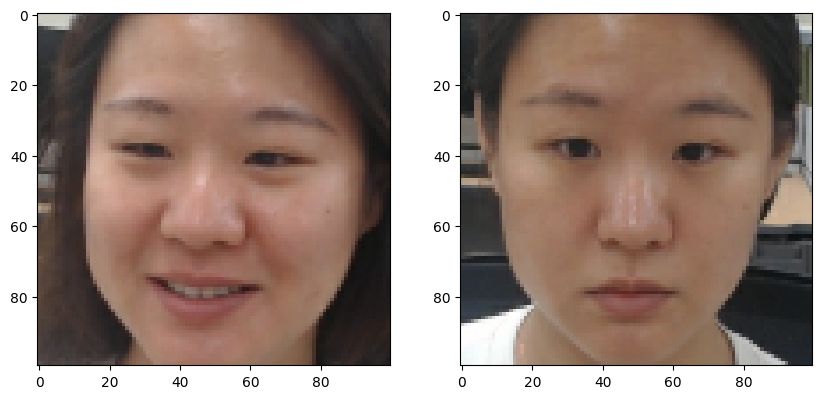

In [82]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[5])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[5])

# Renders cleanly
plt.show()

# 7. Save Model

In [83]:
# Save weights 
siamese_model.save('C:/Users/piai/Desktop/faceid/app/siamesemodelv2.h5')

In [84]:
L1Dist

__main__.L1Dist

In [85]:
# Reload model 
import os
model_path = os.path.join('C:/Users/piai/Desktop/faceid/app', 'siamesemodelv2.h5')
siamese_model = tf.keras.models.load_model(model_path, custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.losses.BinaryCrossentropy})

In [86]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

array([[7.9816027e-06],
       [5.2600957e-10],
       [2.6482749e-13],
       [1.0000000e+00],
       [6.8348333e-10],
       [9.9999940e-01],
       [1.0000000e+00],
       [9.9754876e-01],
       [4.7647259e-06],
       [3.1143483e-09],
       [6.4460826e-10],
       [1.0000000e+00],
       [9.9563462e-01],
       [5.2635656e-11],
       [1.0000000e+00],
       [4.8490423e-11]], dtype=float32)

In [87]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 8. Real Time Test

## 8.1 Verification Function

In [88]:
VERIFICATION_PATH = os.path.join('app','application_data', 'verification_images')
INPUT_PATH=os.path.join('app','application_data', 'input_image')

os.makedirs(VERIFICATION_PATH)
os.makedirs(INPUT_PATH)

In [89]:
print(VERIFICATION_PATH)
print(POS_PATH)

app\application_data\verification_images
data\positive


In [90]:
# pick and move random 50 images from positive to verification_images folders
import shutil

NUM_IMAGES = 100 

# Get a list of all image files in the POS_PATH directory
image_files = [file for file in os.listdir(POS_PATH) if file.endswith('.jpg') or file.endswith('.png')]

# Select 50 random images from the list
random_images = random.sample(image_files, NUM_IMAGES)

# Move the selected images to the VERIFICATION_PATH directory
for image in random_images:
    source = os.path.join(POS_PATH, image)
    destination = os.path.join(VERIFICATION_PATH, image)
    shutil.copy(source, destination)

In [91]:
os.listdir(os.path.join('app','application_data', 'verification_images'))

['004671c2-13a4-11ee-98bb-6c2b59da29e4.jpg',
 '01c4d1bc-13a5-11ee-9a6c-6c2b59da29e4.jpg',
 '01df5105-13a5-11ee-8ae7-6c2b59da29e4.jpg',
 '0a2baf97-13a4-11ee-aeac-6c2b59da29e4.jpg',
 '0ec8e8d1-13a4-11ee-b526-6c2b59da29e4.jpg',
 '1035904a-13a3-11ee-add7-6c2b59da29e4.jpg',
 '1153056b-13a3-11ee-b184-6c2b59da29e4.jpg',
 '11779897-13a3-11ee-94d8-6c2b59da29e4.jpg',
 '12a28390-13a4-11ee-88e6-6c2b59da29e4.jpg',
 '12da363e-13a4-11ee-8b63-6c2b59da29e4.jpg',
 '155186ad-13b0-11ee-a405-6c2b59da29e4.jpg',
 '183791be-13a3-11ee-943a-6c2b59da29e4.jpg',
 '1a05dc5c-13a4-11ee-a87d-6c2b59da29e4.jpg',
 '20410e87-13b0-11ee-9ecd-6c2b59da29e4.jpg',
 '2080398c-13a3-11ee-b845-6c2b59da29e4.jpg',
 '21525baf-13b0-11ee-9d73-6c2b59da29e4.jpg',
 '21788305-13a5-11ee-ba4a-6c2b59da29e4.jpg',
 '230530e4-13a3-11ee-a605-6c2b59da29e4.jpg',
 '2311313c-13a3-11ee-b179-6c2b59da29e4.jpg',
 '244256a4-13b0-11ee-b39e-6c2b59da29e4.jpg',
 '25eae01b-13a4-11ee-8545-6c2b59da29e4.jpg',
 '26729d4c-13b0-11ee-ba02-6c2b59da29e4.jpg',
 '2718356d

In [92]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [93]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('app','application_data', 'verification_images')):
        input_img = preprocess(os.path.join('app','application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('app','application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('app','application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [94]:
import cv2
import os

# Load face detection cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened(): 
    ret, frame = cap.read()
   
    cv2.imshow('Verification', frame)
    
    # Face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Cut down frame to 250x250px
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]
        resized_face = cv2.resize(face_roi, (250, 250))
        cv2.imshow('Cropped Face', resized_face)
        
        # Verification trigger
        if cv2.waitKey(10) & 0xFF == ord('v'):
            # Save cropped face as an input image
            cv2.imwrite(os.path.join('app', 'application_data', 'input_image', 'input_image.jpg'), resized_face)
            
            # Run verification
            results, verified = verify(siamese_model, 0.9, 0.8)
            print(verified)
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

True
False
False
True


In [ ]:
# siamese_model.summary()

In [ ]:
np.sum(np.squeeze(results) > 0.9)

In [ ]:
91/100

In [ ]:
results